**Coding Challenge**

In this coding challenge, you will apply the concepts of Association Rule Learning

1) Utilize the Apriori Algorithm to uncover frequent itemsets 

2) Discover the strongest association rules that have high lift and high confidence

3) Create a Directed Graph to surface the association rules identified in Step 2 above

**Resources**:

- The Wikipedia articles for [association rule learning](https://en.wikipedia.org/wiki/Association_rule_learning) and the [Apriori algorithm](https://en.wikipedia.org/wiki/Apriori_algorithm) provide a good introduction and overview of the topic.
- The `mlxtend` package provides an [implementation of Apriori](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/) ([source code](https://github.com/rasbt/mlxtend/blob/master/mlxtend/frequent_patterns/apriori.py)) - it is encouraged to read and understand the documentation and code, so you can be a savvy user of it.
- The `networkx` package has a [tutorial for drawing a directed graph](https://networkx.github.io/documentation/networkx-1.10/tutorial/index.html).


**Dataset: ** The data you will utilize is from the **UCI Machine Learning Repository** and represents transactional data from a UK retailer from 2010 through 2011. The data set represents sales to wholesalers so it is slightly different from data representing customer purchase patterns but is still a useful data set for the purposes of this exercise.

The data set can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

**Guidance for coding challenge**:

1) Focus on the data for the following 2 countries: 1) **Germany** and 2) **Belgium**. Go through the 3 steps highlighted above for each of the 2 countries. This analysis will enable you to compare/constrast the sales of frequent itemsets in the "Germany" from that in "Belgium"

2) You will need to prepare the data. For example: some of the invoices contact 'C' in front of the invoice number; these invoices should be removed from the dataset

3) Product descriptions with a value of 'POSTAGE' in it will need to be treated since it could negatively skew/impact the results

4) You will have to transpose the data set so that you get a proper representation of the underlying data set that can be feed into the Apriori Algorithm

*Hint:* Good Reference while exploring your data set - https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9

**Communicate your findings**:

One of the common tasks for Data Scientists in the real world is to communicate their findings. Summarize your analysis and make recomendations on how you could potentially improve/bolster sales for the Online Retailer

In [1]:
! pip install mlxtend

In [2]:
! pip install xlrd

In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
data_raw = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
print(data_raw.shape)
data_raw.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing

In [6]:
# remove non-ineger invoice numbers (i.e. those starting with 'C')

data = data_raw[pd.to_numeric(data_raw['InvoiceNo'], errors='coerce').notnull()]
print(data.shape)

(532618, 8)


In [7]:
data = data[data['Description']!='POSTAGE']
print(data.shape)

(531492, 8)


In [8]:
transactions_per_row = data[data['Country'] == 'Germany'].pivot_table(
    index='InvoiceNo', columns='Description', values='Quantity',
    aggfunc='sum', fill_value=0)

transactions_per_row.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
purchase_sets = transactions_per_row.applymap(
    lambda quantity: 1 if quantity >= 1 else 0)
purchase_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Frequent Item Sets

In [10]:
apriori(purchase_sets, min_support=0.05, use_colnames=True).head()

,support,itemsets
0,0.104677,[6 RIBBONS RUSTIC CHARM]
1,0.071269,[ALARM CLOCK BAKELIKE PINK]
2,0.066815,[CHARLOTTE BAG APPLES DESIGN]
3,0.051225,[CHILDRENS CUTLERY DOLLY GIRL ]
4,0.062361,[COFFEE MUG APPLES DESIGN]


## Association Rules

In [11]:
frequent_itemsets = apriori(purchase_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.08)
rules.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.118040,0.140312,0.069042,0.584906,4.168613,0.052480,2.071067
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.140312,0.118040,0.069042,0.492063,4.168613,0.052480,1.736359
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(PLASTERS IN TIN CIRCUS PARADE ),0.160356,0.118040,0.051225,0.319444,2.706237,0.032296,1.295941
3,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.118040,0.160356,0.051225,0.433962,2.706237,0.032296,1.483370
4,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.118040,0.249443,0.057906,0.490566,1.966644,0.028462,1.473315


## Directed Graph

In [0]:
DG = nx.MultiDiGraph()
edges = [(set(rules.iloc[ix]['antecedants']).pop(), 
          set(rules.iloc[ix]['consequents']).pop(), 
          rules.iloc[ix]['lift']) for ix in range(rules.shape[0])]
DG.add_weighted_edges_from(edges)

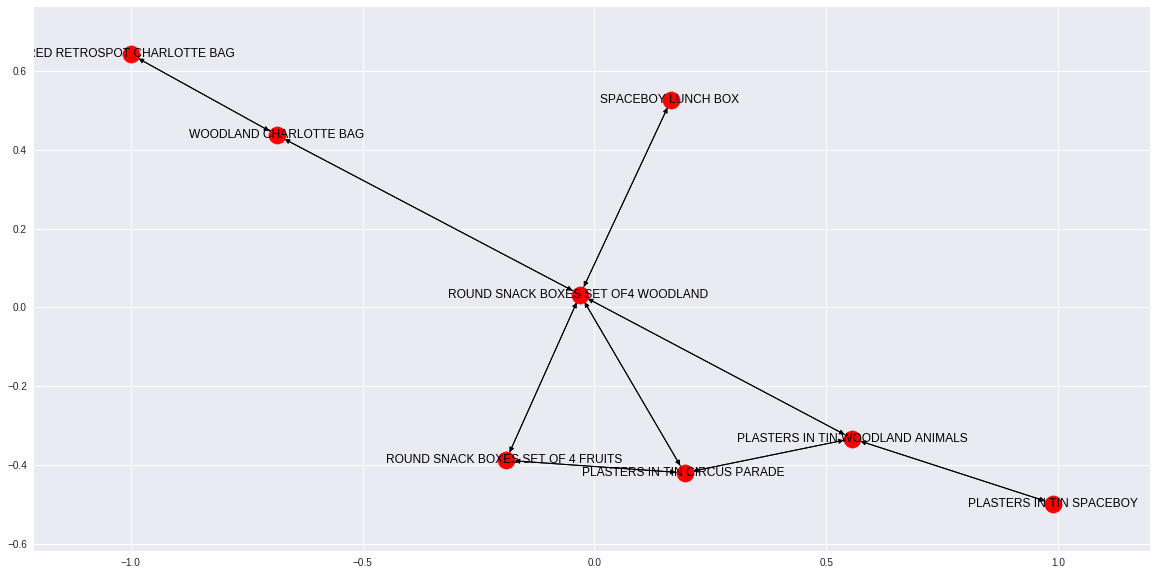

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))

nx.draw_networkx(DG, with_labels=True, ax=ax)

## Repeating Analysis for Belgium

In [0]:
def get_association_rules(data, country, min_support=0.05, use_colnames=True, metric='confidence', min_threshold=0.08):
    
    transactions_per_row = data[data['Country'] == country].pivot_table(
    index='InvoiceNo', columns='Description', values='Quantity',
    aggfunc='sum', fill_value=0)
    
    purchase_sets = transactions_per_row.applymap(
    lambda quantity: 1 if quantity >= 1 else 0)
    frequent_itemsets = apriori(purchase_sets, min_support=min_support, use_colnames=use_colnames)
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    
    return rules

In [15]:
data = data[data['Description']!='POSTAGE']
data = data_raw[pd.to_numeric(data_raw['InvoiceNo'], errors='coerce').notnull()]
rules_belgium = get_association_rules(data, 'Belgium', min_support=0.1)

rules_belgium.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.132653,0.122449,0.102041,0.769231,6.282051,0.085798,3.802721
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.122449,0.132653,0.102041,0.833333,6.282051,0.085798,5.204082
2,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.122449,0.979592,0.122449,1.000000,1.020833,0.002499,inf
3,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.979592,0.122449,0.122449,0.125000,1.020833,0.002499,1.002915
4,(ALARM CLOCK BAKELIKE RED ),(POSTAGE),0.132653,0.979592,0.132653,1.000000,1.020833,0.002707,inf


In [0]:
DG = nx.MultiDiGraph()
edges = [(set(rules_belgium.iloc[ix]['antecedants']).pop(), 
          set(rules_belgium.iloc[ix]['consequents']).pop(), 
          rules_belgium.iloc[ix]['lift']) for ix in range(rules_belgium.shape[0])]
DG.add_weighted_edges_from(edges)

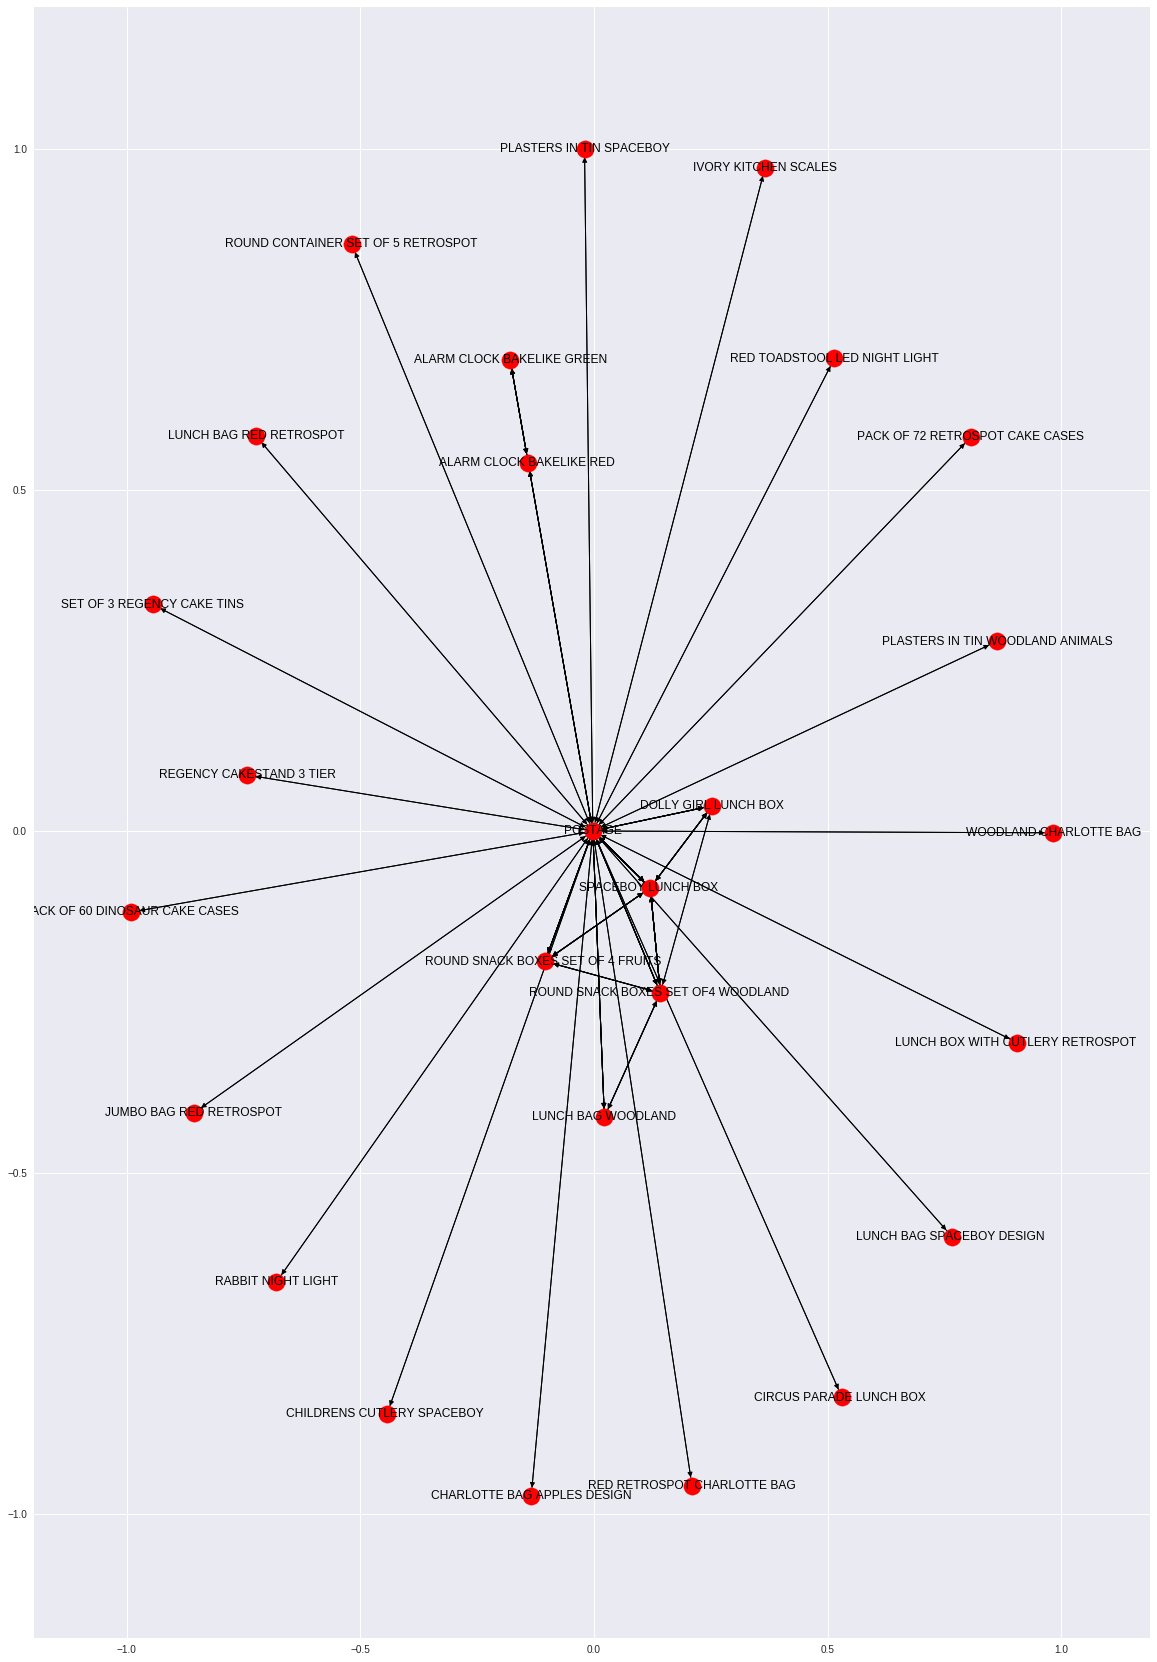

In [17]:
fig, ax = plt.subplots(figsize=(20, 30))

nx.draw_networkx(DG, with_labels=True, ax=ax)